In [39]:
import numpy as np

In [40]:
Data = np.load('dataset.npz')
Data['d'][0]

array([0.21901627])

In [79]:
def Predict(x, cov, dt, trans, rot, v_var, om_var):
    '''
    x => [x,y,theta]
    cov => covariance matrix [3x3]
    trans => translational velocity
    rot => rotational velocity
    '''
    new_x = x + dt*np.dot(np.array([[np.cos(x[2]),np.sin(x[2]),0],[0,0,1]]).T, np.array([trans, rot]))

    J = np.array([
        [1, 0, -dt*trans*np.sin(x[2])],
        [0, 1, dt*trans*np.cos(x[2])],
        [0, 0, 1]
    ])
    
    Q = np.array([
        [v_var, 0, 0],
        [0, v_var, 0],
        [0, 0, om_var]
    ])
    
    new_cov = np.dot(J, np.dot(cov, J.T)) +Q
    
    return new_x, new_cov

In [42]:
def Update(x, cov, z_r, z_b, landmarks, d, v_var, om_var):
    # find z
    z = np.zeros((34,1))
    h = np.zeros((34,1))
    H = np.zeros((34,3))
    R = np.zeros((34,34))
    print(x.shape)
    
    for i in range(17):
        # z
        z[i*2] = z_r[i]
        z[i*2+1] = z_b[i]
        
        # h
        h[i*2] = np.sqrt((landmarks[i,0]-x[0]-d*np.cos(x[2]))**2 + (landmarks[i,1]-x[1]-d*np.sin(x[2]))**2)
        h[i*2+1] = np.arctan2(landmarks[i,1]-x[1]-d*np.sin(x[2]), landmarks[i,0]-x[0]-d*np.cos(x[2])) - x[2]
        
        # R
        R[i*2,i*2] = v_var 
        R[i*2+1,i*2+1] = om_var
        
        # H
        if z[i*2] == 0:
            continue
        x_diff = landmarks[i,0]-x[0]-d*np.cos(x[2])
        y_diff = landmarks[i,1]-x[1]-d*np.sin(x[2])
        H[i*2] = np.array([
            -(x_diff),
            -(y_diff),
            (x_diff)*d*np.sin(x[2]) - (y_diff)*d*np.cos(x[2])
        ])/np.sqrt(x_diff**2+y_diff**2)
        H[i*2+1] = np.array([
            y_diff,
            -x_diff,
            -(x_diff)*d*np.cos(x[2]) - (y_diff)*d*np.sin(x[2])
        ])/(x_diff**2+y_diff**2)
        H[i*2+1,2] -= 1
        
    #R = np.dot(A, np.dot(R, A.T))
        
    y = z-h
    
    S = np.dot(H, np.dot(cov, H.T)) + R
    K = np.dot(cov, np.dot(H.T, np.linalg.inv(S)))
    
    new_x = x[:,np.newaxis] + np.dot(K, y)
    new_cov = cov - np.dot(K, np.dot(H, cov))
    
    new_x[2] = (new_x[2] + np.pi) % (2 * np.pi) - np.pi
    return new_x, new_cov

In [85]:
all_xs = []
X=[]
cur_x = np.array([Data['x_true'][0][0],
                  Data['y_true'][0][0],
                  Data['th_true'][0][0]])
#X.append(cur_x)
cur_sigma = np.array([[1,0,0],[0,1,0],[0,0,0.1]])

#for i in range(1,Data['t'].shape[0]):
for i in range(1,5000):
    print('>', i, Data['t'].shape[0])
    dt = Data['t'][i][0] - Data['t'][i-1][0]
    
    pred_x, pred_sigma = Predict(
        cur_x, 
        cur_sigma, 
        dt, 
        Data['v'][i][0], 
        Data['om'][i][0], 
        Data['v_var'][0][0], 
        Data['om_var'][0][0]
    )
    '''
    new_x, new_sigma = Update(pred_x, 
           pred_sigma, 
           Data['r'][i], 
           Data['b'][i], 
           Data['l'], 
           Data['d'][0][0],
           Data['r_var'][0][0], 
           Data['om_var'][0][0]
          )
    
    '''
    
    cur_x[:] = pred_x[:]
    X.append(pred_x)
    cur_sigma = pred_sigma
    current_x = np.array([Data['x_true'][i][0], Data['y_true'][i][0], Data['th_true'][i][0]])
    error = np.mean((cur_x - current_x)**2)
    all_xs.append(error)

> 1 12609
> 2 12609
> 3 12609
> 4 12609
> 5 12609
> 6 12609
> 7 12609
> 8 12609
> 9 12609
> 10 12609
> 11 12609
> 12 12609
> 13 12609
> 14 12609
> 15 12609
> 16 12609
> 17 12609
> 18 12609
> 19 12609
> 20 12609
> 21 12609
> 22 12609
> 23 12609
> 24 12609
> 25 12609
> 26 12609
> 27 12609
> 28 12609
> 29 12609
> 30 12609
> 31 12609
> 32 12609
> 33 12609
> 34 12609
> 35 12609
> 36 12609
> 37 12609
> 38 12609
> 39 12609
> 40 12609
> 41 12609
> 42 12609
> 43 12609
> 44 12609
> 45 12609
> 46 12609
> 47 12609
> 48 12609
> 49 12609
> 50 12609
> 51 12609
> 52 12609
> 53 12609
> 54 12609
> 55 12609
> 56 12609
> 57 12609
> 58 12609
> 59 12609
> 60 12609
> 61 12609
> 62 12609
> 63 12609
> 64 12609
> 65 12609
> 66 12609
> 67 12609
> 68 12609
> 69 12609
> 70 12609
> 71 12609
> 72 12609
> 73 12609
> 74 12609
> 75 12609
> 76 12609
> 77 12609
> 78 12609
> 79 12609
> 80 12609
> 81 12609
> 82 12609
> 83 12609
> 84 12609
> 85 12609
> 86 12609
> 87 12609
> 88 12609
> 89 12609
> 90 12609
> 91 12609
> 92 126

> 741 12609
> 742 12609
> 743 12609
> 744 12609
> 745 12609
> 746 12609
> 747 12609
> 748 12609
> 749 12609
> 750 12609
> 751 12609
> 752 12609
> 753 12609
> 754 12609
> 755 12609
> 756 12609
> 757 12609
> 758 12609
> 759 12609
> 760 12609
> 761 12609
> 762 12609
> 763 12609
> 764 12609
> 765 12609
> 766 12609
> 767 12609
> 768 12609
> 769 12609
> 770 12609
> 771 12609
> 772 12609
> 773 12609
> 774 12609
> 775 12609
> 776 12609
> 777 12609
> 778 12609
> 779 12609
> 780 12609
> 781 12609
> 782 12609
> 783 12609
> 784 12609
> 785 12609
> 786 12609
> 787 12609
> 788 12609
> 789 12609
> 790 12609
> 791 12609
> 792 12609
> 793 12609
> 794 12609
> 795 12609
> 796 12609
> 797 12609
> 798 12609
> 799 12609
> 800 12609
> 801 12609
> 802 12609
> 803 12609
> 804 12609
> 805 12609
> 806 12609
> 807 12609
> 808 12609
> 809 12609
> 810 12609
> 811 12609
> 812 12609
> 813 12609
> 814 12609
> 815 12609
> 816 12609
> 817 12609
> 818 12609
> 819 12609
> 820 12609
> 821 12609
> 822 12609
> 823 12609
> 82

> 1414 12609
> 1415 12609
> 1416 12609
> 1417 12609
> 1418 12609
> 1419 12609
> 1420 12609
> 1421 12609
> 1422 12609
> 1423 12609
> 1424 12609
> 1425 12609
> 1426 12609
> 1427 12609
> 1428 12609
> 1429 12609
> 1430 12609
> 1431 12609
> 1432 12609
> 1433 12609
> 1434 12609
> 1435 12609
> 1436 12609
> 1437 12609
> 1438 12609
> 1439 12609
> 1440 12609
> 1441 12609
> 1442 12609
> 1443 12609
> 1444 12609
> 1445 12609
> 1446 12609
> 1447 12609
> 1448 12609
> 1449 12609
> 1450 12609
> 1451 12609
> 1452 12609
> 1453 12609
> 1454 12609
> 1455 12609
> 1456 12609
> 1457 12609
> 1458 12609
> 1459 12609
> 1460 12609
> 1461 12609
> 1462 12609
> 1463 12609
> 1464 12609
> 1465 12609
> 1466 12609
> 1467 12609
> 1468 12609
> 1469 12609
> 1470 12609
> 1471 12609
> 1472 12609
> 1473 12609
> 1474 12609
> 1475 12609
> 1476 12609
> 1477 12609
> 1478 12609
> 1479 12609
> 1480 12609
> 1481 12609
> 1482 12609
> 1483 12609
> 1484 12609
> 1485 12609
> 1486 12609
> 1487 12609
> 1488 12609
> 1489 12609
> 1490 12609

> 2058 12609
> 2059 12609
> 2060 12609
> 2061 12609
> 2062 12609
> 2063 12609
> 2064 12609
> 2065 12609
> 2066 12609
> 2067 12609
> 2068 12609
> 2069 12609
> 2070 12609
> 2071 12609
> 2072 12609
> 2073 12609
> 2074 12609
> 2075 12609
> 2076 12609
> 2077 12609
> 2078 12609
> 2079 12609
> 2080 12609
> 2081 12609
> 2082 12609
> 2083 12609
> 2084 12609
> 2085 12609
> 2086 12609
> 2087 12609
> 2088 12609
> 2089 12609
> 2090 12609
> 2091 12609
> 2092 12609
> 2093 12609
> 2094 12609
> 2095 12609
> 2096 12609
> 2097 12609
> 2098 12609
> 2099 12609
> 2100 12609
> 2101 12609
> 2102 12609
> 2103 12609
> 2104 12609
> 2105 12609
> 2106 12609
> 2107 12609
> 2108 12609
> 2109 12609
> 2110 12609
> 2111 12609
> 2112 12609
> 2113 12609
> 2114 12609
> 2115 12609
> 2116 12609
> 2117 12609
> 2118 12609
> 2119 12609
> 2120 12609
> 2121 12609
> 2122 12609
> 2123 12609
> 2124 12609
> 2125 12609
> 2126 12609
> 2127 12609
> 2128 12609
> 2129 12609
> 2130 12609
> 2131 12609
> 2132 12609
> 2133 12609
> 2134 12609

> 2734 12609
> 2735 12609
> 2736 12609
> 2737 12609
> 2738 12609
> 2739 12609
> 2740 12609
> 2741 12609
> 2742 12609
> 2743 12609
> 2744 12609
> 2745 12609
> 2746 12609
> 2747 12609
> 2748 12609
> 2749 12609
> 2750 12609
> 2751 12609
> 2752 12609
> 2753 12609
> 2754 12609
> 2755 12609
> 2756 12609
> 2757 12609
> 2758 12609
> 2759 12609
> 2760 12609
> 2761 12609
> 2762 12609
> 2763 12609
> 2764 12609
> 2765 12609
> 2766 12609
> 2767 12609
> 2768 12609
> 2769 12609
> 2770 12609
> 2771 12609
> 2772 12609
> 2773 12609
> 2774 12609
> 2775 12609
> 2776 12609
> 2777 12609
> 2778 12609
> 2779 12609
> 2780 12609
> 2781 12609
> 2782 12609
> 2783 12609
> 2784 12609
> 2785 12609
> 2786 12609
> 2787 12609
> 2788 12609
> 2789 12609
> 2790 12609
> 2791 12609
> 2792 12609
> 2793 12609
> 2794 12609
> 2795 12609
> 2796 12609
> 2797 12609
> 2798 12609
> 2799 12609
> 2800 12609
> 2801 12609
> 2802 12609
> 2803 12609
> 2804 12609
> 2805 12609
> 2806 12609
> 2807 12609
> 2808 12609
> 2809 12609
> 2810 12609

> 3402 12609
> 3403 12609
> 3404 12609
> 3405 12609
> 3406 12609
> 3407 12609
> 3408 12609
> 3409 12609
> 3410 12609
> 3411 12609
> 3412 12609
> 3413 12609
> 3414 12609
> 3415 12609
> 3416 12609
> 3417 12609
> 3418 12609
> 3419 12609
> 3420 12609
> 3421 12609
> 3422 12609
> 3423 12609
> 3424 12609
> 3425 12609
> 3426 12609
> 3427 12609
> 3428 12609
> 3429 12609
> 3430 12609
> 3431 12609
> 3432 12609
> 3433 12609
> 3434 12609
> 3435 12609
> 3436 12609
> 3437 12609
> 3438 12609
> 3439 12609
> 3440 12609
> 3441 12609
> 3442 12609
> 3443 12609
> 3444 12609
> 3445 12609
> 3446 12609
> 3447 12609
> 3448 12609
> 3449 12609
> 3450 12609
> 3451 12609
> 3452 12609
> 3453 12609
> 3454 12609
> 3455 12609
> 3456 12609
> 3457 12609
> 3458 12609
> 3459 12609
> 3460 12609
> 3461 12609
> 3462 12609
> 3463 12609
> 3464 12609
> 3465 12609
> 3466 12609
> 3467 12609
> 3468 12609
> 3469 12609
> 3470 12609
> 3471 12609
> 3472 12609
> 3473 12609
> 3474 12609
> 3475 12609
> 3476 12609
> 3477 12609
> 3478 12609

> 4070 12609
> 4071 12609
> 4072 12609
> 4073 12609
> 4074 12609
> 4075 12609
> 4076 12609
> 4077 12609
> 4078 12609
> 4079 12609
> 4080 12609
> 4081 12609
> 4082 12609
> 4083 12609
> 4084 12609
> 4085 12609
> 4086 12609
> 4087 12609
> 4088 12609
> 4089 12609
> 4090 12609
> 4091 12609
> 4092 12609
> 4093 12609
> 4094 12609
> 4095 12609
> 4096 12609
> 4097 12609
> 4098 12609
> 4099 12609
> 4100 12609
> 4101 12609
> 4102 12609
> 4103 12609
> 4104 12609
> 4105 12609
> 4106 12609
> 4107 12609
> 4108 12609
> 4109 12609
> 4110 12609
> 4111 12609
> 4112 12609
> 4113 12609
> 4114 12609
> 4115 12609
> 4116 12609
> 4117 12609
> 4118 12609
> 4119 12609
> 4120 12609
> 4121 12609
> 4122 12609
> 4123 12609
> 4124 12609
> 4125 12609
> 4126 12609
> 4127 12609
> 4128 12609
> 4129 12609
> 4130 12609
> 4131 12609
> 4132 12609
> 4133 12609
> 4134 12609
> 4135 12609
> 4136 12609
> 4137 12609
> 4138 12609
> 4139 12609
> 4140 12609
> 4141 12609
> 4142 12609
> 4143 12609
> 4144 12609
> 4145 12609
> 4146 12609

> 4719 12609
> 4720 12609
> 4721 12609
> 4722 12609
> 4723 12609
> 4724 12609
> 4725 12609
> 4726 12609
> 4727 12609
> 4728 12609
> 4729 12609
> 4730 12609
> 4731 12609
> 4732 12609
> 4733 12609
> 4734 12609
> 4735 12609
> 4736 12609
> 4737 12609
> 4738 12609
> 4739 12609
> 4740 12609
> 4741 12609
> 4742 12609
> 4743 12609
> 4744 12609
> 4745 12609
> 4746 12609
> 4747 12609
> 4748 12609
> 4749 12609
> 4750 12609
> 4751 12609
> 4752 12609
> 4753 12609
> 4754 12609
> 4755 12609
> 4756 12609
> 4757 12609
> 4758 12609
> 4759 12609
> 4760 12609
> 4761 12609
> 4762 12609
> 4763 12609
> 4764 12609
> 4765 12609
> 4766 12609
> 4767 12609
> 4768 12609
> 4769 12609
> 4770 12609
> 4771 12609
> 4772 12609
> 4773 12609
> 4774 12609
> 4775 12609
> 4776 12609
> 4777 12609
> 4778 12609
> 4779 12609
> 4780 12609
> 4781 12609
> 4782 12609
> 4783 12609
> 4784 12609
> 4785 12609
> 4786 12609
> 4787 12609
> 4788 12609
> 4789 12609
> 4790 12609
> 4791 12609
> 4792 12609
> 4793 12609
> 4794 12609
> 4795 12609

(999,)
(999,)
3.021911049301358 (999, 3)


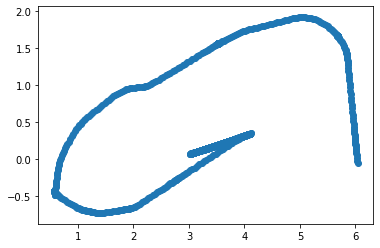

In [83]:
X=np.array(X)
import matplotlib.pyplot as plt
x=X[:,0]
y=X[:,1]
print(x.shape)
print(y.shape)

plt.scatter(x,y)
print(x[0],X.shape)

[3.01975613]
4.8112840395664564


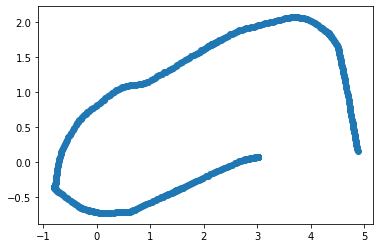

In [84]:
gt_x=Data['x_true']
gt_y=Data['y_true']


#print(x)
print(gt_x[0])
gt_x=gt_x[1:1000]
gt_y=gt_y[1:1000]
plt.scatter(gt_x,gt_y)
l=
a=np.array(all_xs)
print(np.mean(a))